### Kit PiKrige: Kriging Ordinario 3D

**Bibliotecas:**

In [38]:
from pykrige.ok3d import OrdinaryKriging3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

**Lectura de archivo:**

In [39]:
carpeta = "C:/Users/Heber/Desktop/curso_geopython/dataset_curso/"
archivo = "muestras_cu.csv"

df = pd.read_csv(carpeta + archivo, sep=";")

In [40]:
df.head(1)

,Este [X],Norte [Y],Cota [Z],Ley de Cobre [%],Ley de Oro [ppm],Tipo de roca
0,193.0,528.6,39.0,0.12,0.0,1


**Información básica del dataset:**

In [46]:
print("N° de datos:", df['Ley de Cobre [%]'].shape)

N° de datos: (2380,)


In [49]:
print("xmin:", df['Este [X]'].min(), "xmax:", df['Este [X]'].max(), "ymin:", df['Norte [Y]'].min(), "ymax:", df['Norte [Y]'].max(), "zmin:", df['Cota [Z]'].min(), "zmax:", df['Cota [Z]'].max())

xmin: 0.2 xmax: 399.0 ymin: 2.2 ymax: 598.9 zmin: 6.0 zmax: 136.0


In [52]:
print("Varianza de la ley de cobre:", round(df['Ley de Cobre [%]'].var(),2))

Varianza de la ley de cobre: 0.42


**Conversión de las variables a ndarray:**

In [53]:
x = np.array(df['Este [X]'])
y = np.array(df['Norte [Y]'])
z = np.array(df['Cota [Z]'])
val = np.array(df['Ley de Cobre [%]'])

**Variograma:**

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.2237191577381189
Full Sill: 0.4448786730701004
Range: 161.67206062574257
Nugget: 0.22115951533198153 



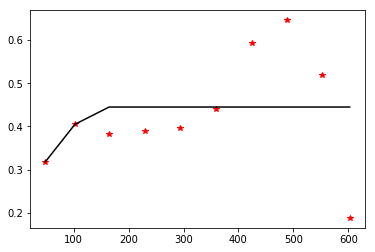

Calculating statistics on variogram model fit...
Q1 = 0.461081892100211
Q2 = 0.7610599838070543
cR = 0.21791687136806986 



In [54]:
ok3d = OrdinaryKriging3D(x,y,z,val,variogram_model='spherical', nlags=10, enable_plotting=True, verbose=True)

**Grid set:**

In [55]:
gridx= np.linspace(0,410, num=41, endpoint=False)
gridy= np.linspace(0,610, num=61, endpoint=False)
gridz= np.linspace(0,150, num=15, endpoint=False)

In [59]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing='ij')

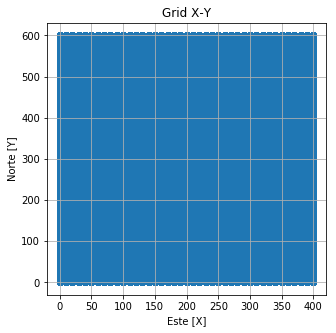

In [63]:
fig = plt.figure(figsize=(5,5))
plot1 = fig.add_subplot(111)
a = plt.scatter(xg,yg)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Grid X-Y")
plt.grid(True)

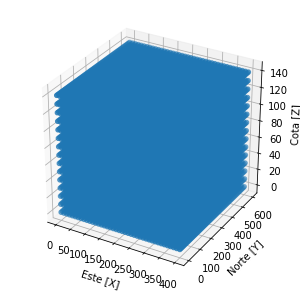

In [66]:
fig3d = plt.figure(figsize=(5,5))
plot3d = fig3d.add_subplot(111, projection='3d')
plot3d.scatter(xg,yg,zg)
plot3d.set_xlabel("Este [X]")
plot3d.set_ylabel("Norte [Y]")
plot3d.set_zlabel("Cota [Z]")
plt.show()

**Kriging Ordinario 3d:**

In [67]:
k3d, ss3d = ok3d.execute('grid', gridx, gridy, gridz)

Executing Ordinary Kriging...

